In [48]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf


In [49]:
def load_vehicle_data(vehicles_path='data'):
  csv_path = os.path.join(vehicles_path, "project_data.csv")
  return pd.read_csv(csv_path)

vehicles = load_vehicle_data()
vehicles.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [50]:
# Removing outlier vehicle prices that are dramatically outside standard deviation
vehicles.drop(vehicles[vehicles['selling_price'] >= 1750000].index, inplace = True)

# Removing 'Test Drive Car' instances since it's NOT numerically related to other owner types
# AND NOT BEING USED FOR ONE HOT ENCODING
vehicles.drop(vehicles[vehicles['owner'] == 'Test Drive Car'].index, inplace = True)

# Since 'Electric' 'fuel' type since only 1 instance
vehicles.drop(vehicles[vehicles['fuel'] == 'Electric'].index, inplace = True)

In [51]:
# CREATING INTEGERS OF NUMBER OF OWNWERS
current_owner_strings = ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']
new_owner_strings = ['1', '2', '3', '4']
vehicles['owner'] = vehicles['owner'].replace(current_owner_strings, new_owner_strings)
vehicles['owner'] = vehicles['owner'].astype('int64') # Convert type to integers:


# 0 index converting for category column's for future one-hot encoded data 

current_owner_strings = ['Petrol', 'Diesel', 'CNG', 'LPG']
new_strings = ['0', '1', '2', '3']
vehicles['fuel'] = vehicles['fuel'].replace(current_owner_strings, new_strings)
vehicles['fuel'] = vehicles['fuel'].astype('int64')


current_owner_strings = ['Individual', 'Dealer', 'Trustmark Dealer']
new_strings = ['0', '1', '2']
vehicles['seller_type'] = vehicles['seller_type'].replace(current_owner_strings, new_strings)
vehicles['seller_type'] = vehicles['seller_type'].astype('int64')


current_owner_strings = ['Manual', 'Automatic']
new_strings = ['0', '1']
vehicles['transmission'] = vehicles['transmission'].replace(current_owner_strings, new_strings)
vehicles['transmission'] = vehicles['transmission'].astype('int64')

In [52]:
vehicles.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,2


In [53]:
from sklearn.model_selection import train_test_split

# train_set, test_set = train_test_split(vehicles, test_size=0.2, random_state=42)
X1 = vehicles[['year', 'km_driven']]
X2 = vehicles[['year', 'km_driven', 'owner', 'fuel', 'transmission', 'seller_type']]
y = vehicles['selling_price']

print(X1)
print(y)

      year  km_driven
0     2007      70000
1     2007      50000
2     2012     100000
3     2017      46000
4     2014     141000
...    ...        ...
4335  2014      80000
4336  2014      80000
4337  2009      83000
4338  2016      90000
4339  2016      40000

[4194 rows x 2 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4194, dtype: int64


In [54]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y, test_size=0.1, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y, test_size=0.1, random_state=42)

In [55]:
print(X1_test.iloc[0])

year          2016
km_driven    72500
Name: 3377, dtype: int64


### POLYNOMIAL REGRESSION

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [57]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x1_train_poly = poly.fit_transform(X1_train)
x1_test_poly = poly.transform(X1_test)
print(x1_test_poly)

x2_train_poly = poly.fit_transform(X2_train)
x2_test_poly = poly.transform(X2_test)
print(x2_test_poly)

[[2.01600000e+03 7.25000000e+04 4.06425600e+06 1.46160000e+08
  5.25625000e+09]
 [2.00400000e+03 1.20000000e+05 4.01601600e+06 2.40480000e+08
  1.44000000e+10]
 [2.00900000e+03 1.50000000e+05 4.03608100e+06 3.01350000e+08
  2.25000000e+10]
 ...
 [2.01500000e+03 4.00000000e+04 4.06022500e+06 8.06000000e+07
  1.60000000e+09]
 [2.01500000e+03 4.00000000e+04 4.06022500e+06 8.06000000e+07
  1.60000000e+09]
 [2.01400000e+03 6.82930000e+04 4.05619600e+06 1.37542102e+08
  4.66393385e+09]]
[[2.0160e+03 7.2500e+04 1.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [2.0040e+03 1.2000e+05 2.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0090e+03 1.5000e+05 3.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [2.0150e+03 4.0000e+04 2.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0150e+03 4.0000e+04 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0140e+03 6.8293e+04 2.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]]


In [58]:
model1 = LinearRegression()
model1.fit(x1_train_poly, y1_train)
y1_pred = model1.predict(x1_test_poly)
print(model1.coef_)
print(model1.intercept_)

model2 = LinearRegression()
model2.fit(x2_train_poly, y2_train)
y2_pred = model2.predict(x2_test_poly)


[-8.29487830e+06 -8.73841735e+01  2.07221857e+03  4.37318854e-02
 -5.49071748e-07]
8300963553.353352


In [59]:
print(len(y1_test))
print(len(y1_pred))


420
420


In [60]:
mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)
n1 = len(y1_pred)
me1 = mean_absolute_percentage_error(y1_test, y1_pred)

print('-------------------------')

print('Mean Squared Error:', mse1)
print('R-squared:', r2_1)
print('mean absolute percentage error: ', me1)

print('-------------------------')
mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)
n2 = len(y2_pred)
me2 = mean_absolute_percentage_error(y2_test, y2_pred)
print('Mean Squared Error:', mse2)
print('R-squared:', r2_2)
print('mean absolute percentage error: ', me2)


-------------------------
Mean Squared Error: 67856293121.76862
R-squared: 0.30509264989066254
mean absolute percentage error:  0.5283086760514635
-------------------------
Mean Squared Error: 40830081399.85974
R-squared: 0.581864520370877
mean absolute percentage error:  0.4210230318511398


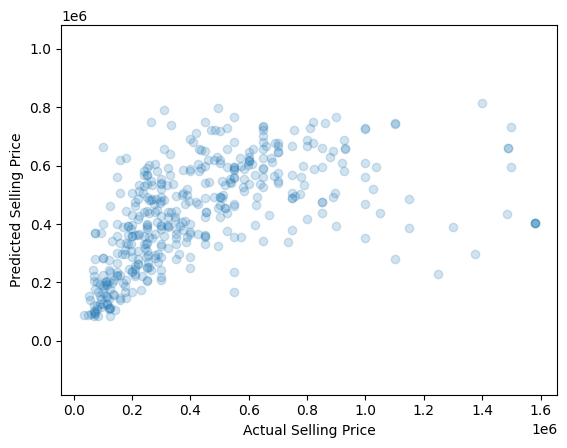

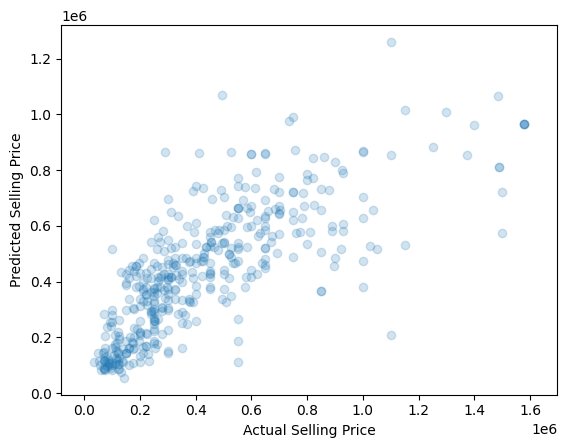

In [61]:
import matplotlib.pyplot as plt

# Plot the predicted selling prices versus the actual selling prices
plt.scatter(y1_test, y1_pred, alpha=0.2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.axis('equal')
plt.show()

# Plot the predicted selling prices versus the actual selling prices
plt.scatter(y2_test, y2_pred, alpha=0.2)
plt.axis('equal')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()